In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print(" ЗАГРУЗКА ДАННЫХ...")
df = pd.read_csv('/Users/provalenov_m/Desktop/jupyter_projects/git_jupyter/Sample - Superstore.csv', encoding='latin-1')
print(" Данные загружены!")
print(f"Размер данных: {df.shape}")




 ЗАГРУЗКА ДАННЫХ...
 Данные загружены!
Размер данных: (9994, 21)


In [17]:
print(" ПЕРВЫЙ ВЗГЛЯД НА ДАННЫЕ:")
display(df.head(3))

print("\n СТРУКТУРА ДАННЫХ:")
print(df.info())

 ПЕРВЫЙ ВЗГЛЯД НА ДАННЫЕ:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714



 СТРУКТУРА ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   f

In [18]:
print(" НАЗВАНИЯ СТОЛБЦОВ:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

 НАЗВАНИЯ СТОЛБЦОВ:
1. Row ID
2. Order ID
3. Order Date
4. Ship Date
5. Ship Mode
6. Customer ID
7. Customer Name
8. Segment
9. Country
10. City
11. State
12. Postal Code
13. Region
14. Product ID
15. Category
16. Sub-Category
17. Product Name
18. Sales
19. Quantity
20. Discount
21. Profit


 ПРОСТАЯ ВИЗУАЛИЗАЦИЯ:


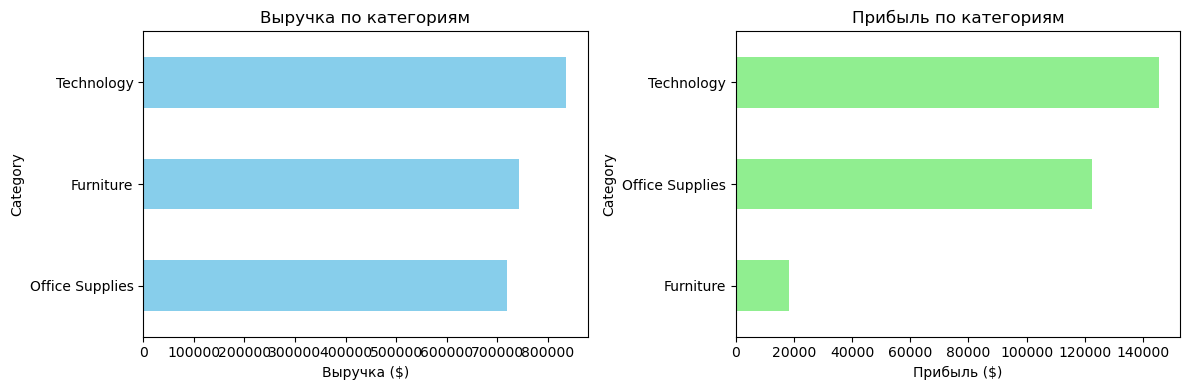

In [19]:
print(" ПРОСТАЯ ВИЗУАЛИЗАЦИЯ:")

plt.figure(figsize=(12, 4))
# График 1: Выручка 
plt.subplot(1, 2, 1)
df.groupby('Category')['Sales'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Выручка по категориям')
plt.xlabel('Выручка ($)')

# График 2: Прибыль
plt.subplot(1, 2, 2)
df.groupby('Category')['Profit'].sum().sort_values().plot(kind='barh', color='lightgreen')
plt.title('Прибыль по категориям')
plt.xlabel('Прибыль ($)')

plt.tight_layout()
plt.show()

In [20]:
print(" АНАЛИЗ ПО РЕГИОНАМ:")

regional_analysis = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique',
    'Customer ID': 'nunique'
}).round(2)

regional_analysis.columns = ['Выручка', 'Прибыль', 'Заказы', 'Клиенты']
display(regional_analysis.sort_values('Выручка', ascending=False))

 АНАЛИЗ ПО РЕГИОНАМ:


,Выручка,Прибыль,Заказы,Клиенты
Region,,,,
West,725457.82,108418.45,1611,686
East,678781.24,91522.78,1401,674
Central,501239.89,39706.36,1175,629
South,391721.90,46749.43,822,512


 ВИЗУАЛИЗАЦИЯ ПО РЕГИОНАМ:


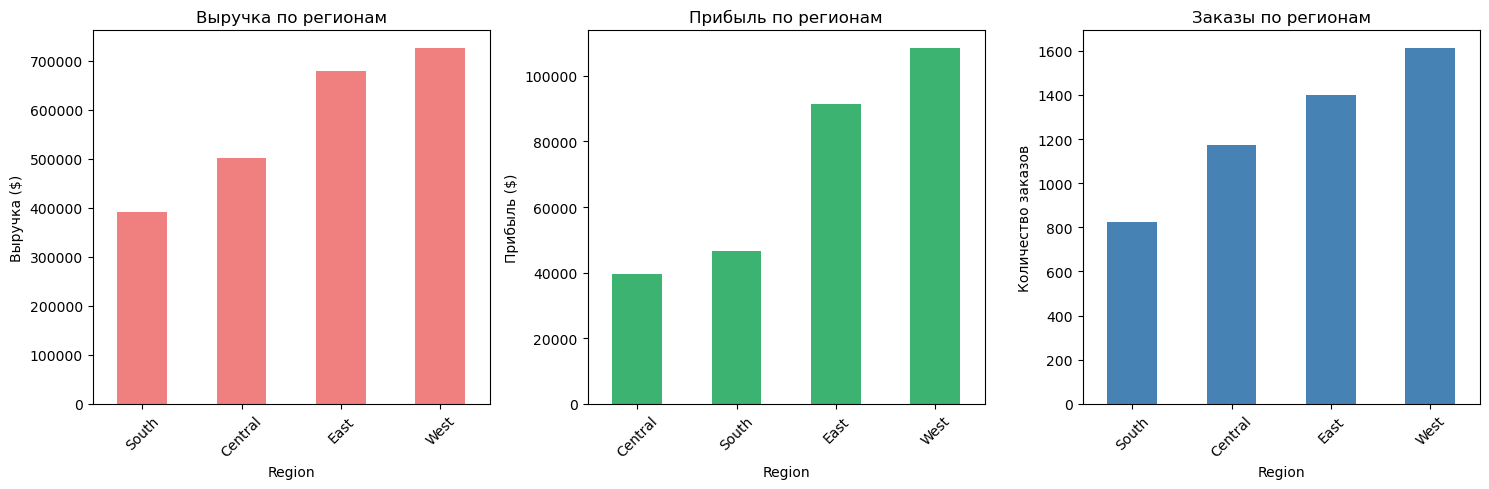

In [21]:
print(" ВИЗУАЛИЗАЦИЯ ПО РЕГИОНАМ:")

plt.figure(figsize=(15, 5))

# График 1: Выручка по регионам
plt.subplot(1, 3, 1)
df.groupby('Region')['Sales'].sum().sort_values().plot(kind='bar', color='lightcoral')
plt.title('Выручка по регионам')
plt.ylabel('Выручка ($)')
plt.xticks(rotation=45)

# График 2: Прибыль по регионам
plt.subplot(1, 3, 2)
df.groupby('Region')['Profit'].sum().sort_values().plot(kind='bar', color='mediumseagreen')
plt.title('Прибыль по регионам')
plt.ylabel('Прибыль ($)')
plt.xticks(rotation=45)

# График 3: Количество заказов по регионам
plt.subplot(1, 3, 3)
df.groupby('Region')['Order ID'].nunique().sort_values().plot(kind='bar', color='steelblue')
plt.title('Заказы по регионам')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()  

In [22]:
print(" ТОП-10 САМЫХ ПРИБЫЛЬНЫХ ТОВАРОВ:")

top_products = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).nlargest(10, 'Profit').round(2)

display(top_products)

 ТОП-10 САМЫХ ПРИБЫЛЬНЫХ ТОВАРОВ:


,Sales,Profit,Quantity
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,61599.82,25199.93,20
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.38,7753.04,31
Hewlett Packard LaserJet 3310 Copier,18839.69,6983.88,38
Canon PC1060 Personal Laser Copier,11619.83,4570.93,19
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.90,4094.98,12
Ativa V4110MDD Micro-Cut Shredder,7699.89,3772.95,11
"3D Systems Cube Printer, 2nd Generation, Magenta",14299.89,3717.97,11
Plantronics Savi W720 Multi-Device Wireless Headset System,9367.29,3696.28,24
Ibico EPK-21 Electric Binding System,15875.92,3345.28,13


In [23]:
print(" АНАЛИЗ ПРОДАЖ ПО МЕСЯЦАМ:")

df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).round(2)

monthly_sales.columns = ['Выручка', 'Прибыль', 'Количество заказов']
display(monthly_sales)

 АНАЛИЗ ПРОДАЖ ПО МЕСЯЦАМ:


,Выручка,Прибыль,Количество заказов
Order Date,,,
2014-01,14236.90,2450.19,32
2014-02,4519.89,862.31,28
2014-03,55691.01,498.73,71
2014-04,28295.34,3488.84,66
2014-05,23648.29,2738.71,69
2014-06,34595.13,4976.52,66
2014-07,33946.39,-841.48,65
2014-08,27909.47,5318.10,72
2014-09,81777.35,8328.10,130


 ТРЕНДЫ ПРОДАЖ ПО МЕСЯЦАМ:


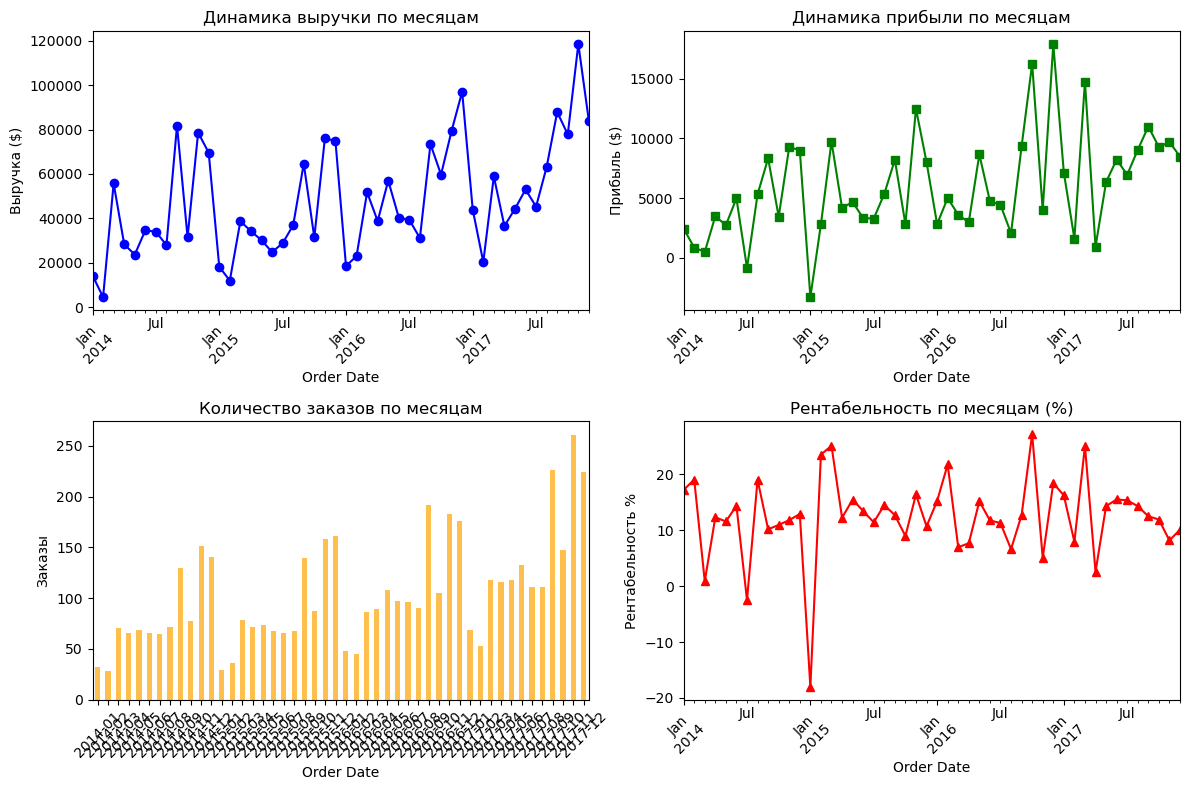

In [24]:
print(" ТРЕНДЫ ПРОДАЖ ПО МЕСЯЦАМ:")

plt.figure(figsize=(12, 8))

# График 1: Динамика выручки
plt.subplot(2, 2, 1)
monthly_sales['Выручка'].plot(kind='line', marker='o', color='blue')
plt.title('Динамика выручки по месяцам')
plt.ylabel('Выручка ($)')
plt.xticks(rotation=45)

# График 2: Динамика прибыли
plt.subplot(2, 2, 2)
monthly_sales['Прибыль'].plot(kind='line', marker='s', color='green')
plt.title('Динамика прибыли по месяцам')
plt.ylabel('Прибыль ($)')
plt.xticks(rotation=45)

# График 3: Количество заказов
plt.subplot(2, 2, 3)
monthly_sales['Количество заказов'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Количество заказов по месяцам')
plt.ylabel('Заказы')
plt.xticks(rotation=45)

# График 4: Прибыльность (маржа)
plt.subplot(2, 2, 4)
profit_margin = (monthly_sales['Прибыль'] / monthly_sales['Выручка'] * 100).round(2)
profit_margin.plot(kind='line', marker='^', color='red')
plt.title('Рентабельность по месяцам (%)')
plt.ylabel('Рентабельность %')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [25]:
print(" АНАЛИЗ КЛИЕНТОВ:")

customer_analysis = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique',
    'Order Date': 'max'
}).round(2)

customer_analysis.columns = ['Общая выручка', 'Общая прибыль', 'Количество заказов', 'Последний заказ']

# Сегментируем клиентов

customer_analysis['Сегмент'] = pd.cut(customer_analysis['Общая выручка'], 
                                    bins=[0, 100, 500, float('inf')],
                                    labels=['Малые', 'Средние', 'Крупные'])

print(" СЕГМЕНТАЦИЯ КЛИЕНТОВ:")
segment_stats = customer_analysis.groupby('Сегмент').agg({
    'Общая выручка': ['count', 'sum'],
    'Общая прибыль': 'sum'
}).round(2)

display(segment_stats)

 АНАЛИЗ КЛИЕНТОВ:
 СЕГМЕНТАЦИЯ КЛИЕНТОВ:


/var/folders/vg/m7pwcb7s4v56x5wd5m7p71wh0000gn/T/ipykernel_4610/4193376106.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = customer_analysis.groupby('Сегмент').agg({


Общая выручка             Общая прибыль
                count         sum           sum
Сегмент                                        
Малые              14      697.02        134.51
Средние            59    17845.63       2021.87
Крупные           720  2278658.23     284240.76

In [26]:
print(" ИТОГОВАЯ СВОДКА ДЛЯ ОТЧЕТА:")

key_metrics = {
    "Общая выручка": f"${df['Sales'].sum():,.2f}",
    "Общая прибыль": f"${df['Profit'].sum():,.2f}",
    "Всего заказов": df['Order ID'].nunique(),
    "Уникальных клиентов": df['Customer ID'].nunique(),
    "Уникальных товаров": df['Product ID'].nunique(),
    "Средний чек": f"${df['Sales'].mean():.2f}",
    "Самая продаваемая категория": df.groupby('Category')['Sales'].sum().idxmax(),
    "Самый прибыльный регион": df.groupby('Region')['Profit'].sum().idxmax()
}

print(" КЛЮЧЕВЫЕ МЕТРИКИ ПРОЕКТА:")
for metric, value in key_metrics.items():
    print(f"• {metric}: {value}")

 ИТОГОВАЯ СВОДКА ДЛЯ ОТЧЕТА:
 КЛЮЧЕВЫЕ МЕТРИКИ ПРОЕКТА:
• Общая выручка: $2,297,200.86
• Общая прибыль: $286,397.02
• Всего заказов: 5009
• Уникальных клиентов: 793
• Уникальных товаров: 1862
• Средний чек: $229.86
• Самая продаваемая категория: Technology
• Самый прибыльный регион: West


In [29]:
print(" ВЫВОДЫ И РЕКОМЕНДАЦИИ:")

insights = [
    "1.  Самые высокие продажи в категории '{}'".format(df.groupby('Category')['Sales'].sum().idxmax()),
    "2.  Регион '{}' показывает наибольшую прибыль".format(df.groupby('Region')['Profit'].sum().idxmax()),
    "3.  {}% клиентов совершают разовые покупки".format(round((df['Customer ID'].value_counts() == 1).mean() * 100, 1)),
    "4.  Средняя маржа: {}%".format(round((df['Profit'].sum() / df['Sales'].sum()) * 100, 1)),
    "5.  Топ-3 товара приносят {}% прибыли".format(round(df.groupby('Product Name')['Profit'].sum().nlargest(3).sum() / df['Profit'].sum() * 100, 1))
]

for insight in insights:
    print(f" {insight}")

 ВЫВОДЫ И РЕКОМЕНДАЦИИ:
 1.  Самые высокие продажи в категории 'Technology'
 2.  Регион 'West' показывает наибольшую прибыль
 3.  0.6% клиентов совершают разовые покупки
 4.  Средняя маржа: 12.5%
 5.  Топ-3 товара приносят 13.9% прибыли
